(264.60896086028464+0j)
(264.8390082296939+0j)


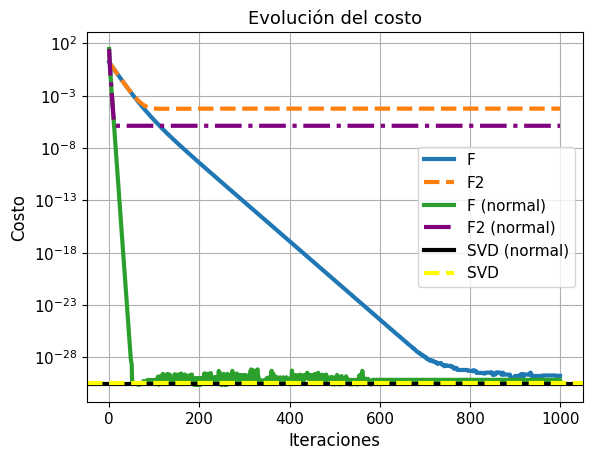

In [194]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(12346)

# Función de costo F(x) = (Ax - b)^T (Ax - b)
def cost_function(A, x, b):
    return np.linalg.norm(A @ x - b)**2

# Gradiente de la función de costo F
def gradient(A, x, b):
    return 2 * A.T @ (A @ x - b)

# Gradiente descendente
def gradient_descent(A, b, x, alpha, num_iterations, regularization=None, delta2=0):
    _, d = A.shape
    cost_history = []
    x_history = []

    for _ in range(num_iterations):
        if regularization == 'L2':
            grad = gradient(A, x, b) + 2 * delta2 * x
        else:
            grad = gradient(A, x, b)

        x = x - alpha * grad
        cost_history.append(cost_function(A, x, b))
        x_history.append(x.copy())

    return x, cost_history, x_history

# Configuración del problema
n = 5
d = 100

#Con distribución uniforme: 
A = np.random.rand(n, d)
b = np.random.rand(n)
x = np.random.rand(d) 

#Con distribución normal:
A_n = np.random.randn(n, d)
b_n = np.random.randn(n)
x_n = np.random.randn(d)

U, S, Vt = np.linalg.svd(A, full_matrices=False)
sigma_max = np.max(S)
num_iterations = 1000
delta2 = 10**(-2) * sigma_max
lambda_max = np.max(np.linalg.eigvals(2 * A.T @ A))
lambda_max_F2 = np.max(np.linalg.eigvals(2 * A.T @ A + 2 * delta2 * np.eye(d)))
print(lambda_max)
print(lambda_max_F2)
alpha = 1 / lambda_max


# Minimización de F
x_min_F, cost_history_F, x_history_F = gradient_descent(A, b, x, alpha, num_iterations)
x_min_F_n, cost_history_F_n, x_history_F_n = gradient_descent(A_n, b_n, x_n, alpha, num_iterations)

# Minimización de F2 
x_min_F2, cost_history_F2, x_history_F2 = gradient_descent(A, b, x, alpha, num_iterations, regularization='L2', delta2=delta2)
x_min_F2_n, cost_history_F2_n, x_history_F2_n = gradient_descent(A_n, b_n, x_n, alpha, num_iterations, regularization='L2', delta2=delta2)

# Solución utilizando SVD
x_svd = np.linalg.pinv(A) @ b 
x_svd_n = np.linalg.pinv(A_n) @ b_n
cost_svd = cost_function(A, x_svd, b)
cost_svd_n = cost_function(A_n, x_svd_n, b_n)

#Graficar costos
plt.semilogy(cost_history_F, label='F', linewidth=3)
plt.semilogy(cost_history_F2, label='F2', linewidth=3,linestyle='--')
plt.semilogy(cost_history_F_n, label='F (normal)', linewidth=3)
plt.semilogy(cost_history_F2_n, label='F2 (normal)', linewidth=3,linestyle='-.', color='purple')
plt.axhline(cost_svd_n, label='SVD (normal)', color = "black", linewidth=3)
plt.axhline(cost_svd, linestyle='--', label='SVD', color = "yellow", linewidth=3)
plt.xlabel('Iteraciones', fontsize=12)
plt.ylabel('Costo', fontsize=12)
plt.legend(fontsize=11)
plt.title('Evolución del costo', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid()
plt.show()

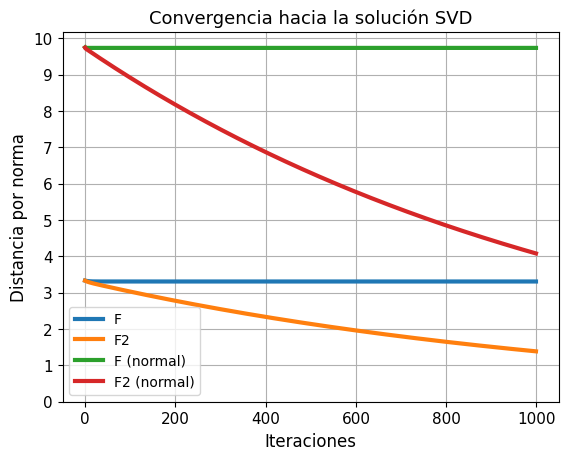

In [195]:
plt.plot(np.linalg.norm(np.array(x_history_F) - x_svd, axis=1), label='F ', linewidth=3)
plt.plot(np.linalg.norm(np.array(x_history_F2) - x_svd, axis=1), label='F2', linewidth=3)
plt.plot(np.linalg.norm(np.array(x_history_F_n) - x_svd_n, axis=1), label='F (normal)', linewidth=3)
plt.plot(np.linalg.norm(np.array(x_history_F2_n) - x_svd_n, axis=1), label='F2 (normal)', linewidth=3)
plt.xlabel('Iteraciones', fontsize=12)
plt.ylabel('Distancia por norma', fontsize=12)
plt.legend(fontsize=10)
plt.title('Convergencia hacia la solución SVD', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(np.arange(0, 11, 1), fontsize=11)
plt.grid()
plt.show()

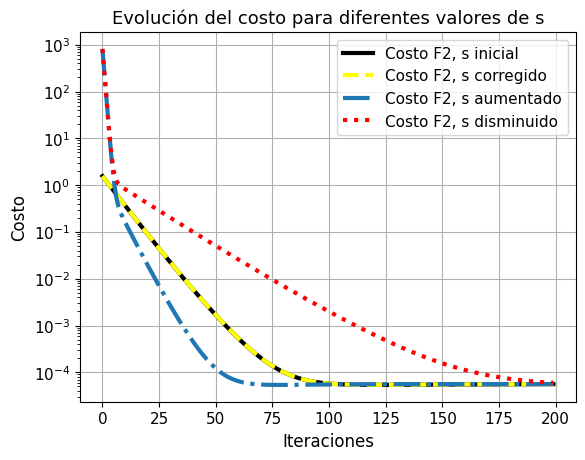

In [196]:
alpha_F2 = 1 / lambda_max_F2
alpha_up = alpha_F2 * 1.5
alpha_down = alpha_F2 * 0.5

x_min_F2_a2, cost_history_F2_a2, x_history_F2_a2 = gradient_descent(A, b, x, alpha_F2, num_iterations, regularization='L2', delta2=delta2)
x_min_F2_up, cost_history_F2_up, x_history_F2_up = gradient_descent(A, b, x, alpha_up, num_iterations, regularization='L2', delta2=delta2)
x_min_F2_d, cost_history_F2_d, x_history_F2_d = gradient_descent(A, b, x, alpha_down, num_iterations, regularization='L2', delta2=delta2)

#Graficar F2 con diferentes valores de alpha
plt.semilogy(cost_history_F2[:200], label='Costo F2, s inicial', linewidth=3, color='black')
plt.semilogy(cost_history_F2_a2[:200], label='Costo F2, s corregido', linewidth=3, linestyle='--', color='yellow')
plt.semilogy(cost_history_F2_up[:200], label='Costo F2, s aumentado', linewidth=3, linestyle='-.')
plt.semilogy(cost_history_F2_d[:200], label='Costo F2, s disminuido', linewidth=3, linestyle=':', color='red')
plt.xlabel('Iteraciones', fontsize=12)
plt.ylabel('Costo', fontsize=12)
plt.legend(fontsize=11)
plt.title('Evolución del costo para diferentes valores de s', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid()
plt.show()

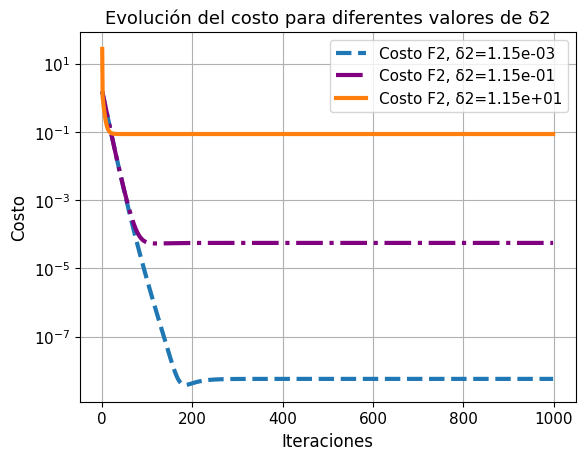

In [197]:
# Variación de delta2
delta2_values = [10**(-4) * sigma_max, 10**(-2) * sigma_max, 10**(0) * sigma_max]
cost_histories = []

for delta2 in delta2_values:
    _, cost_history_F2_varied, _ = gradient_descent(A, b, x, alpha, num_iterations, regularization='L2', delta2=delta2)
    cost_histories.append(cost_history_F2_varied)


plt.semilogy(cost_histories[0], label=f'Costo F2, δ2={delta2_values[0]:.2e}', linestyle='--', linewidth=3)
plt.semilogy(cost_histories[1], label=f'Costo F2, δ2={delta2_values[1]:.2e}', linestyle='-.', linewidth=3, color='purple')
plt.semilogy(cost_histories[2], label=f'Costo F2, δ2={delta2_values[2]:.2e}', linestyle='-', linewidth=3)
plt.xlabel('Iteraciones', fontsize=12)
plt.ylabel('Costo', fontsize=12)
plt.legend(fontsize=11)
plt.title('Evolución del costo para diferentes valores de δ2', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid()
plt.show()